# Simulating Function

In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math
import gc

Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


C:\Users\koush\AppData\Local\Temp\ipykernel_32928\53224557.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


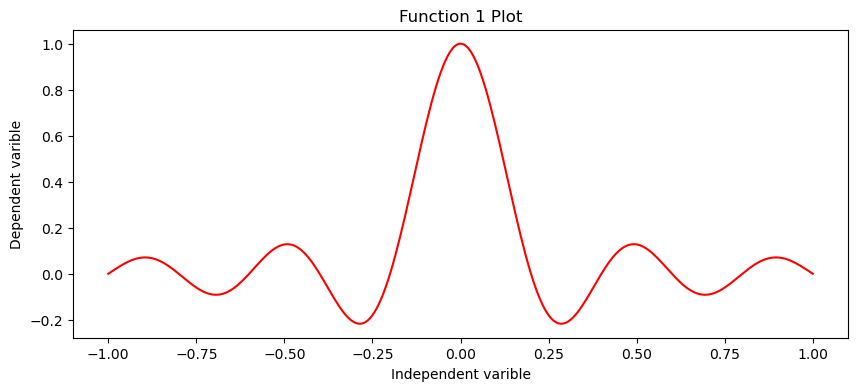

In [2]:
torch.manual_seed(1) 
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)
print('Xshape:',x.shape,"\n Yshape:",y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function 1 Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()
n_samples, n_features = x.shape

In [3]:
def train_func(model,x,y):
    model.train()
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)     
        loss = loss_func(prediction, y)    
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush= True)
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergeance reached for loss:{loss_arr[-1]:.4f} at epoch: {epoch}")
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [4]:
def paramerter_count(m,i):
  a=[]
  for i in m.parameters():
    a.append(torch.numel(i))
  print('No of parameters in Model :'+str(i), np.sum(a),)

In [5]:
def model_weight(m,flag,i):
   if flag:
    print("\nModel "+str(i)+" weight and bias before training\n")
   else:print("\nModel "+str(i)+" weight and bias after training\n")
   for param in m.state_dict():
      print(param, "\t",m.state_dict()[param])

In [6]:
class M1(torch.nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)                  
        self.hidden2 = torch.nn.Linear(5, 10)                 
        self.hidden3 = torch.nn.Linear(10, 10)                
        self.hidden4 = torch.nn.Linear(10, 10)                
        self.hidden5 = torch.nn.Linear(10, 10)                
        self.hidden6 = torch.nn.Linear(10, 10)                
        self.hidden7 = torch.nn.Linear(10, 5)                 
        self.predict = torch.nn.Linear(5, 1)                  

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.hidden1(x))
        x = torch.nn.functional.leaky_relu(self.hidden2(x))
        x = torch.nn.functional.leaky_relu(self.hidden3(x))
        x = torch.nn.functional.leaky_relu(self.hidden4(x))
        x = torch.nn.functional.leaky_relu(self.hidden5(x))
        x = torch.nn.functional.leaky_relu(self.hidden6(x))
        x = torch.nn.functional.leaky_relu(self.hidden7(x))
        x = self.predict(x)                                   
        return x

m1 = M1() 
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()

In [7]:
paramerter_count(m1,1)
model_weight(m1,1,1)
M1epoch_arr,M1loss_arr,M1prediction = train_func(m1,x,y)
model_weight(m1,0,1)

No of parameters in Model :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 weight and bias before training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.317

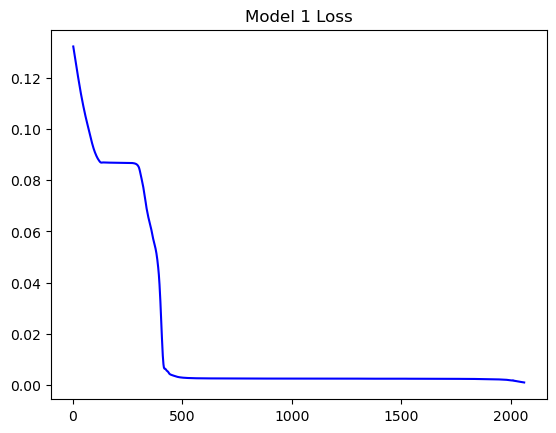

In [8]:
plt.plot(M1epoch_arr,M1loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()

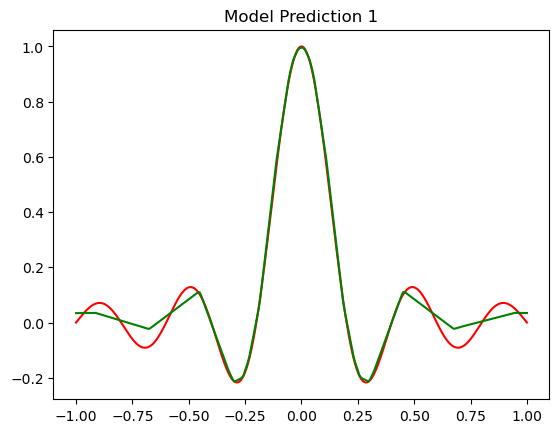

In [9]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1prediction.data.numpy(),color="green")
plt.title('Model Prediction 1')
plt.show()

In [10]:
class M2(torch.nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)   
        self.hidden2 = torch.nn.Linear (10, 18) 
        self.hidden3 = torch.nn.Linear (18, 15) 
        self.hidden4 = torch.nn.Linear (15, 4)  
        self.predict = torch.nn.Linear(4, 1)    
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))       
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = self.predict(x)                     
        return x

m2 = M2()    
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()

In [11]:
paramerter_count(m2,3)
model_weight(m2,1,3)
M2epoch_arr,M2loss_arr,M2prediction = train_func(m2,x,y)
model_weight(m2,0,3)


No of parameters in Model :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985,
    

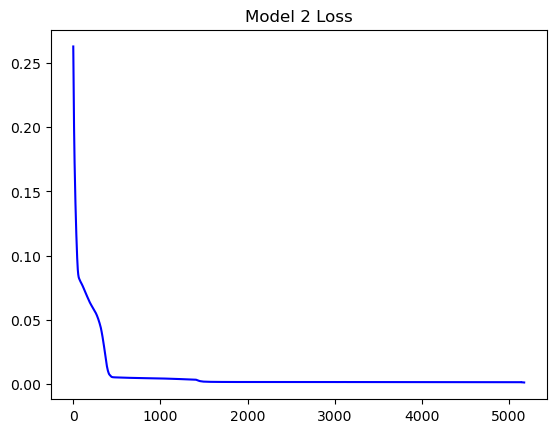

In [12]:
plt.plot(M2epoch_arr,M2loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()

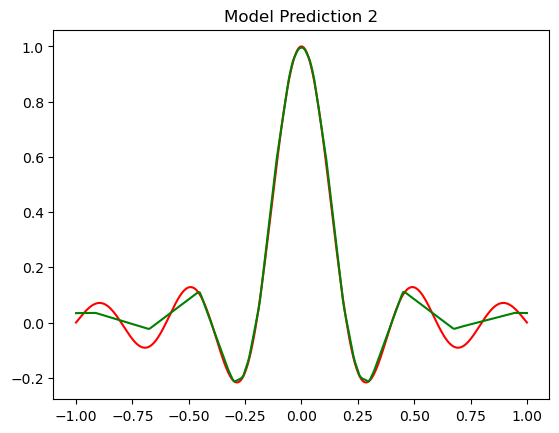

12443

In [13]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1prediction.data.numpy(),color="green")
plt.title('Model Prediction 2')
plt.show()
torch.cuda.empty_cache()
gc.collect()

In [14]:
class M3(torch.nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   
        self.predict = torch.nn.Linear(190, 1)   
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      
        x = self.predict(x)                    
        return x

m3 = M3()     
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 

In [15]:
paramerter_count(m3,1)
model_weight(m3,1,3)
M3epoch_arr,M3loss_arr,M3prediction = train_func(m3,x,y)
model_weight(m3,0,3)

No of parameters in Model :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [ 0.488

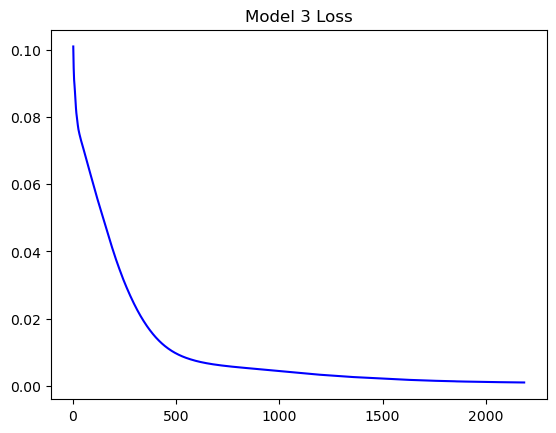

In [16]:
plt.plot(M3epoch_arr,M3loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()

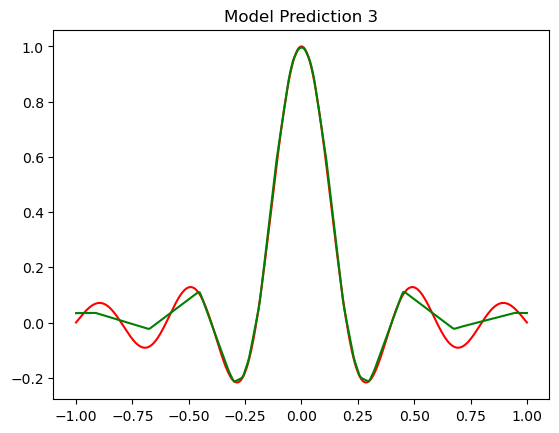

In [17]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1prediction.data.numpy(),color="green")
plt.title('Model Prediction 3')
plt.show()

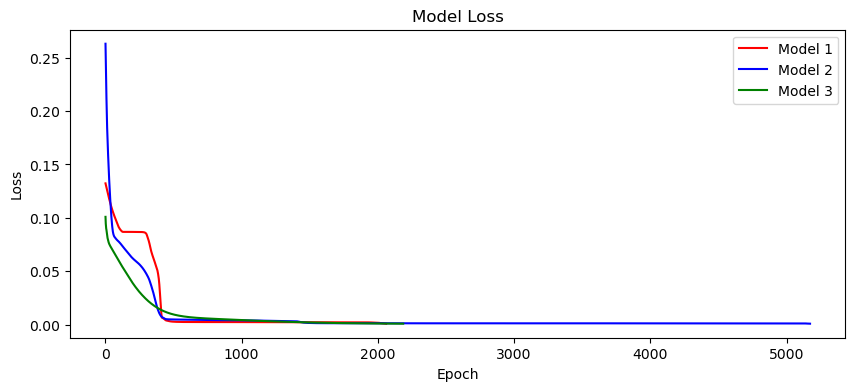

In [18]:
plt.figure(figsize=(10,4))
plt.plot(M1epoch_arr,M1loss_arr, color = "red")
plt.plot(M2epoch_arr,M2loss_arr, color = "blue")
plt.plot(M3epoch_arr,M3loss_arr, color = "green")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


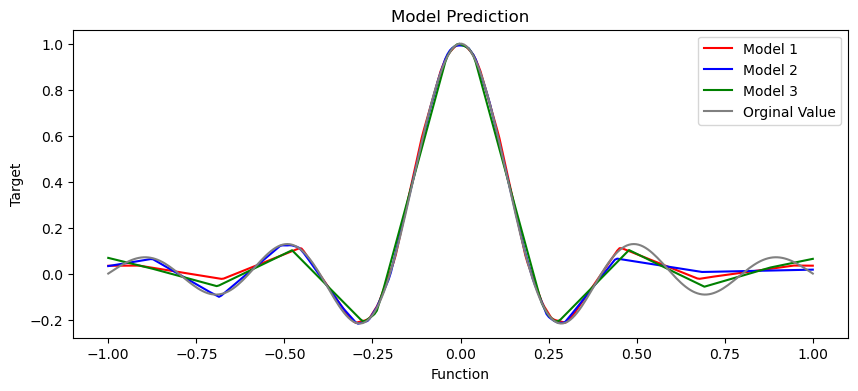

In [19]:
plt.figure(figsize=(10,4))
plt.plot(x,M1prediction.data.numpy(),color="red")
plt.plot(x,M2prediction.data.numpy(),color="blue")
plt.plot(x,M3prediction.data.numpy(),color="green")
plt.plot(x,y.numpy(),color="grey")
plt.title('Model Prediction')
plt.legend(['Model 1', 'Model 2','Model 3','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.show()

C:\Users\koush\AppData\Local\Temp\ipykernel_32928\2349206959.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


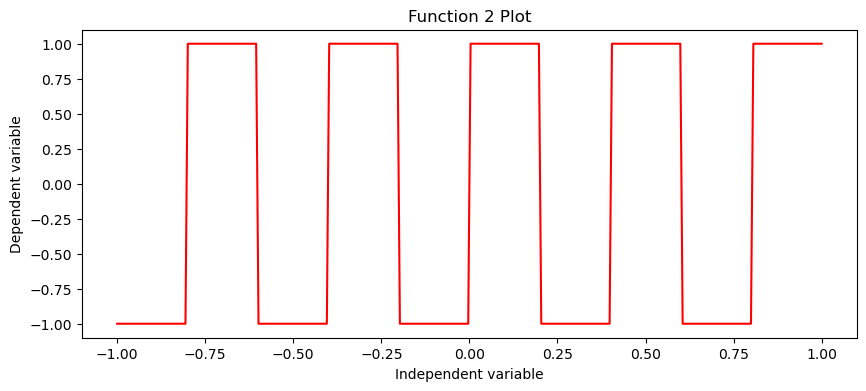

In [46]:
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = np.sign(np.sin(5 * np.pi * x))
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x, y, color='red')
plt.title('Function 2 Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')

plt.show()

n_samples, n_features = x.shape

In [21]:
m1 = M1() 
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()
paramerter_count(m1,1)
model_weight(m1,1,1)
M1epoch_arr,M1loss_arr,M1prediction = train_func(m1,x,y)
model_weight(m1,0,1)

No of parameters in Model :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 weight and bias before training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.317

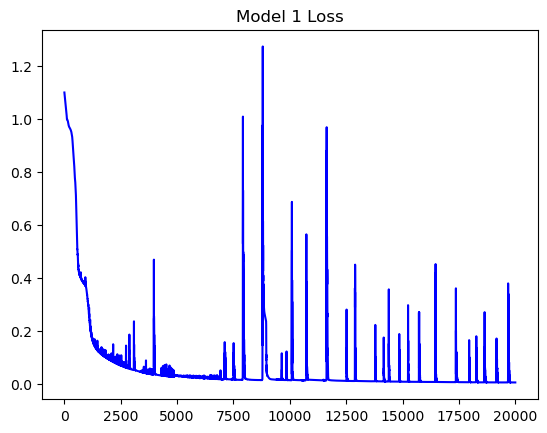

In [22]:
plt.plot(M1epoch_arr,M1loss_arr,color="blue")
plt.title('Model 1 Loss')
plt.show()

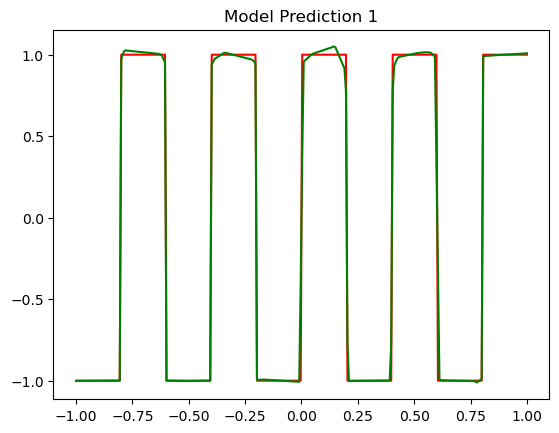

In [23]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1prediction.data.numpy(),color="green")
plt.title('Model Prediction 1')
plt.show()

In [24]:
m2 = M2()   
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
paramerter_count(m2,3)
model_weight(m2,1,3)
M2epoch_arr,M2loss_arr,M2prediction = train_func(m2,x,y)
model_weight(m2,0,3)

No of parameters in Model :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985,
    

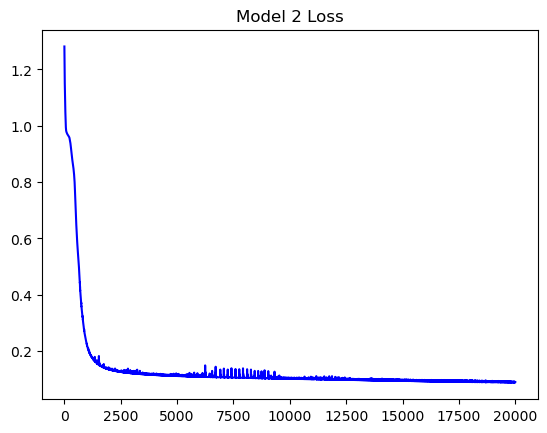

In [25]:
plt.plot(M2epoch_arr,M2loss_arr,color="blue")
plt.title('Model 2 Loss')
plt.show()

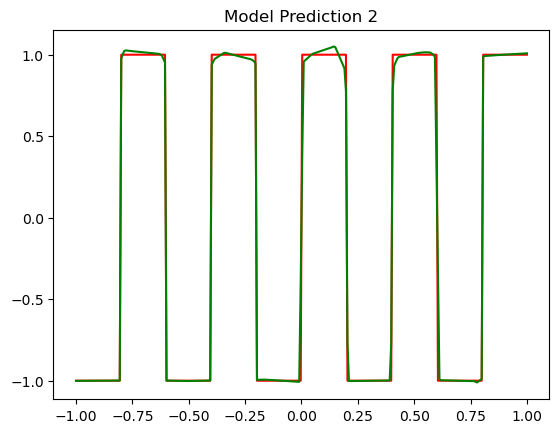

In [26]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1prediction.data.numpy(),color="green")
plt.title('Model Prediction 2')
plt.show()

In [27]:
m3 = M3()    
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
paramerter_count(m3,1)
model_weight(m3,1,3)
M3epoch_arr,M3loss_arr,M3prediction = train_func(m3,x,y)
model_weight(m3,0,3)

No of parameters in Model :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 weight and bias before training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [ 0.488

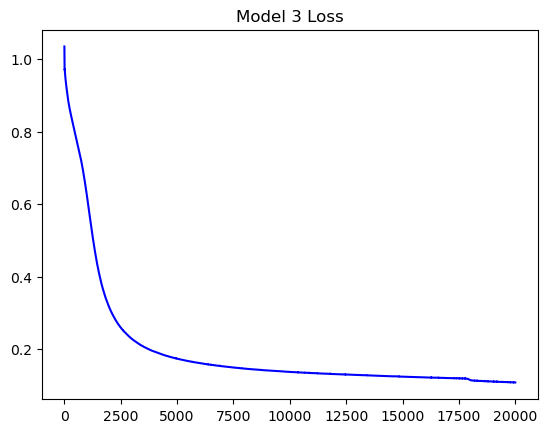

In [28]:
plt.plot(M3epoch_arr,M3loss_arr,color="blue")
plt.title('Model 3 Loss')
plt.show()

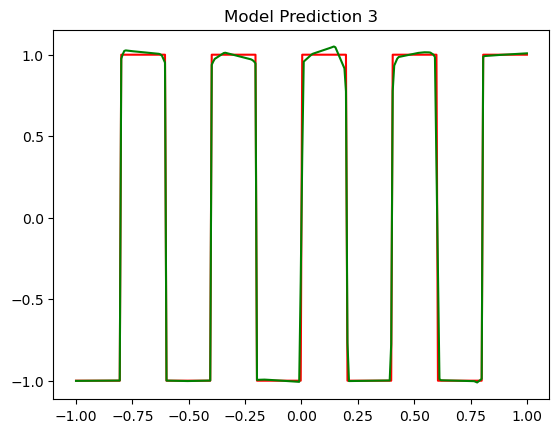

In [29]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1prediction.data.numpy(),color="green")
plt.title('Model Prediction 3')
plt.show()

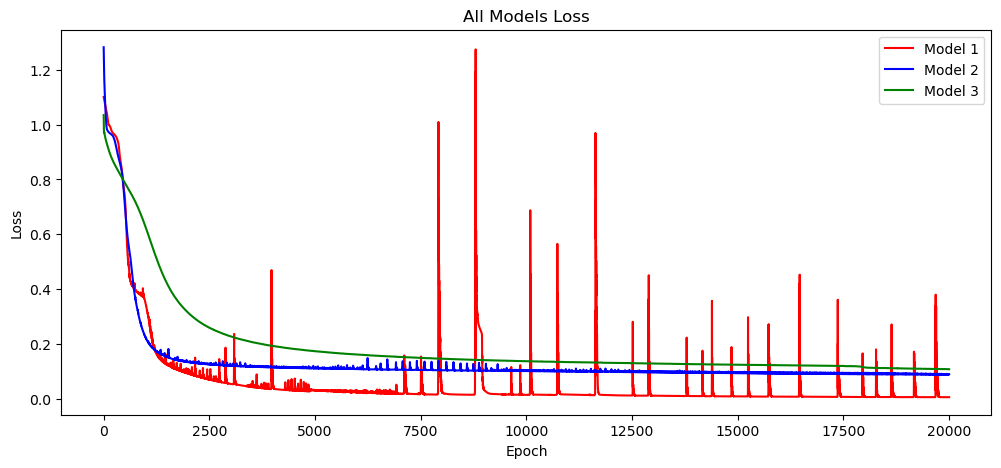

In [30]:
plt.figure(figsize=(12,5))
plt.plot(M1epoch_arr,M1loss_arr, color = "red")
plt.plot(M2epoch_arr,M2loss_arr, color = "blue")
plt.plot(M3epoch_arr,M3loss_arr, color = "green")
plt.title('All Models Loss')
plt.legend(['Model 1', 'Model 2','Model 3','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

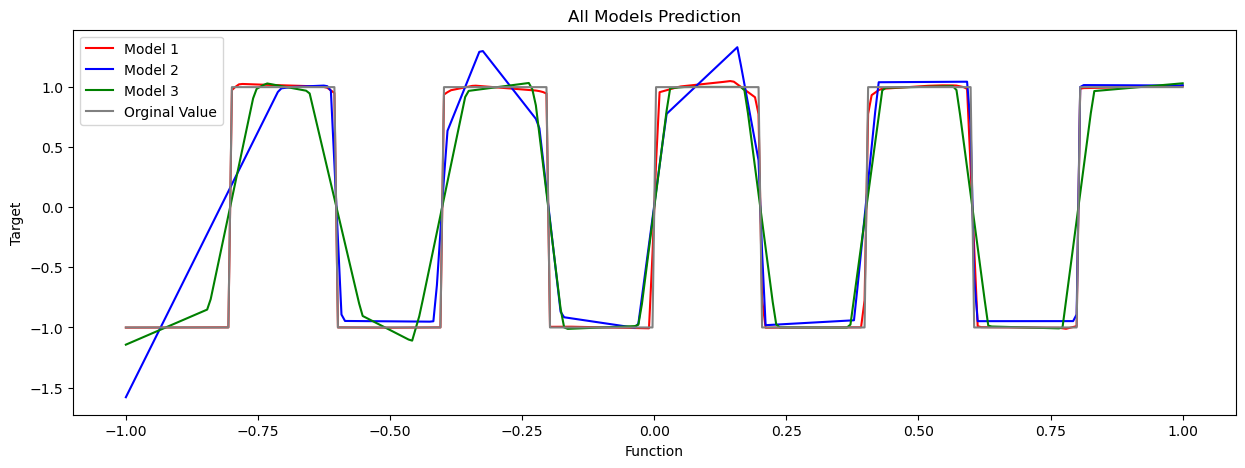

In [31]:
plt.figure(figsize=(15,5))
plt.plot(x,M1prediction.data.numpy(),color="red")
plt.plot(x,M2prediction.data.numpy(),color="blue")
plt.plot(x,M3prediction.data.numpy(),color="green")
plt.plot(x,y.numpy(),color="grey")
plt.title('All Models Prediction')
plt.legend(['Model 1', 'Model 2','Model 3','Orginal Value'],loc='best')
plt.xlabel('Function')
plt.ylabel('Target')
plt.show()

# Train on Actual Task

# MNIST Data

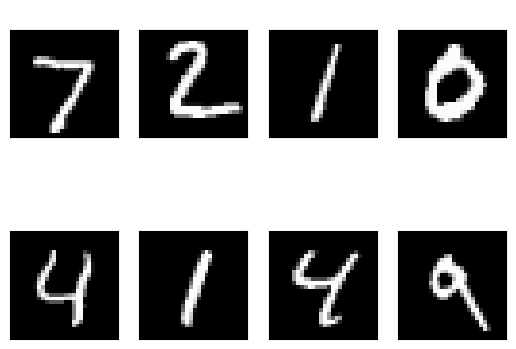

In [32]:
torch.manual_seed(1)

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

test_iter = iter(test_loader)
example_data, example_targets = next(test_iter)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Val: {}".format(example_targets[i]),color='white')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [33]:
def trainingFunc(model,num_epochs):
    model.train()
    n_total_steps = len(train_loader)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    trainAvgLossArr = []
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        lossSum = 0

        for i, (images, labels) in enumerate(train_loader):  
            prediction = model(images)
            loss = loss_func(prediction, labels)
            lossSum += loss.detach().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}',end='\r',flush=True)
                train_epoch.append(epoch)
                train_losses.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %',end='\r',flush=True)
                train_acc.append(acc)

                if epoch == num_epochs:
                        print(f"Max Epoch Reached, Loss: {loss.item():.4f}, Accuracy:{acc:2f}%")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False

        trainAvgLossArr.append(lossSum/i+1)
        
                        
    return train_epoch,train_losses,train_acc,trainAvgLossArr

In [34]:
input_size = 784 
max_epochs = 15
learning_rate = 0.001
kernel_size = 4
weight_decay_val = 1e-4
dropout = 0.25
class CNN1(nn.Module):
    def __init__(self,):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size)  
        self.pool = nn.MaxPool2d(2, 2)              
        self.conv2 = nn.Conv2d(10, 20, kernel_size) 
        self.fc1 = nn.Linear(320, 50)               
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)                         
        x = F.relu(self.fc1(x))                        
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))                                
        x = self.fc3(x)                                    
        return x

In [35]:
torch.manual_seed(1)

cnn1 = CNN1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn1.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]
for i in cnn1.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)
train_epoch,train_losses,train_acc,trainAvgLossArr =trainingFunc(cnn1,max_epochs)

Total no of parameters in Model 1: 25550
Max Epoch Reached, Loss: 0.0945, Accuracy:98.160000%


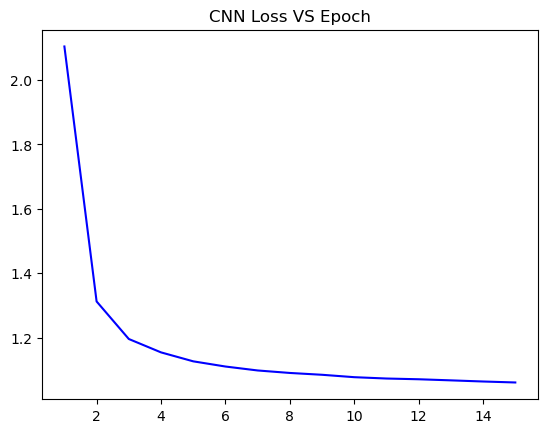

In [36]:
plt.plot(train_epoch,trainAvgLossArr,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()

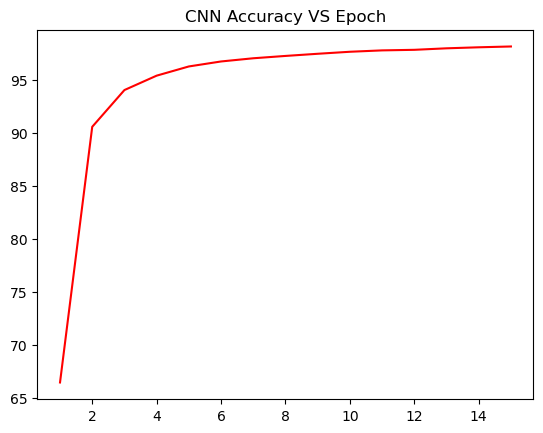

In [37]:
plt.plot(train_epoch,train_acc,color="red")
plt.title('CNN Accuracy VS Epoch')
plt.show()

In [38]:
class CNN2(nn.Module):
    def __init__(self,):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size) 
        self.pool = nn.MaxPool2d(2, 2)    
        self.conv2 = nn.Conv2d(10, 20, kernel_size) 
        self.fc1 = nn.Linear(20*kernel_size*kernel_size, 50)  
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,40)
        self.fc4 = nn.Linear(40,30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))         
        x = F.relu(self.fc3(x))         
        x = F.relu(self.fc4(x))         
        x = self.fc5(x)                      
        return x
torch.manual_seed(1)

cnn2 = CNN2()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn2.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]

for i in cnn2.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 2:', np.sum(a),)
train_epoch2,train_losses2,train_acc2,trainAvgLossArr2=trainingFunc(cnn2,max_epochs)

Total no of parameters in Model 2: 25570
Max Epoch Reached, Loss: 0.0837, Accuracy:97.856667%


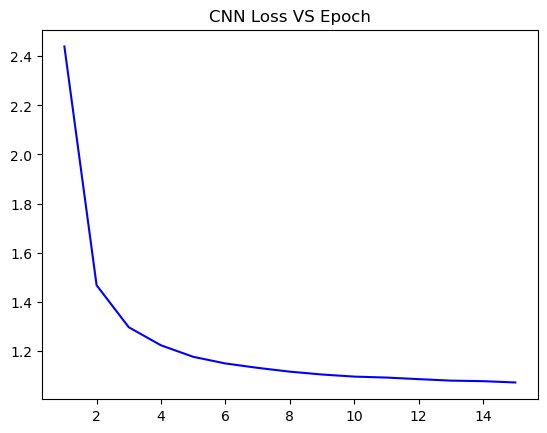

In [39]:
plt.plot(train_epoch2,trainAvgLossArr2,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()

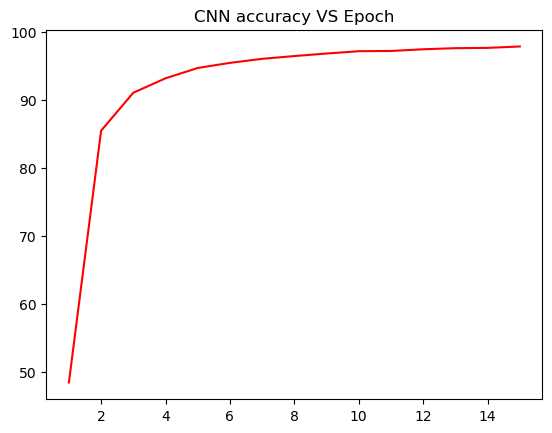

In [40]:
plt.plot(train_epoch2,train_acc2,color="red")
plt.title('CNN accuracy VS Epoch')
plt.show()

In [41]:
class CNN3(nn.Module):
    def __init__(self,): 
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 15, 5)
        self.fc1 = nn.Linear(15*4*4, 86)
        self.fc2 = nn.Linear(86, 10)
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
     
        x = x.view(-1, 15*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x
torch.manual_seed(1)

cnn3 = CNN3()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn3.parameters(), lr=learning_rate, weight_decay = weight_decay_val)

a=[]

for i in cnn3.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 3:', np.sum(a))
train_epoch3,train_losses3,train_acc3,trainAvgLossArr3=trainingFunc(cnn3,max_epochs)

Total no of parameters in Model 3: 25621
Max Epoch Reached, Loss: 0.0237, Accuracy:98.910000%


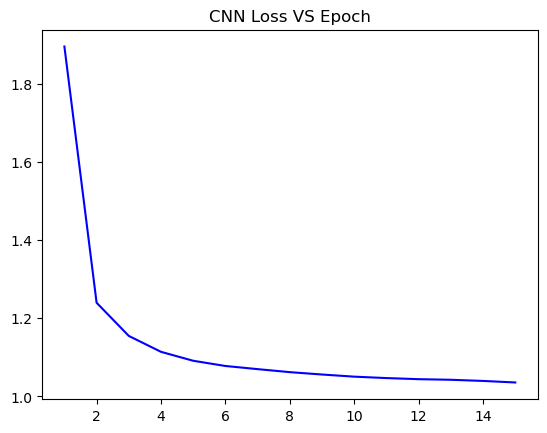

In [42]:
plt.plot(train_epoch3,trainAvgLossArr3,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()

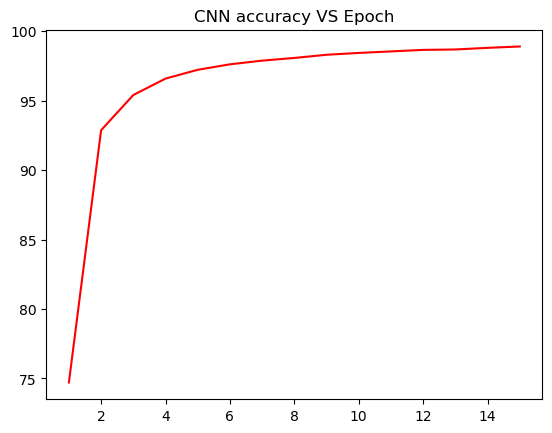

In [43]:
plt.plot(train_epoch3,train_acc3,color="red")
plt.title('CNN accuracy VS Epoch')
plt.show()

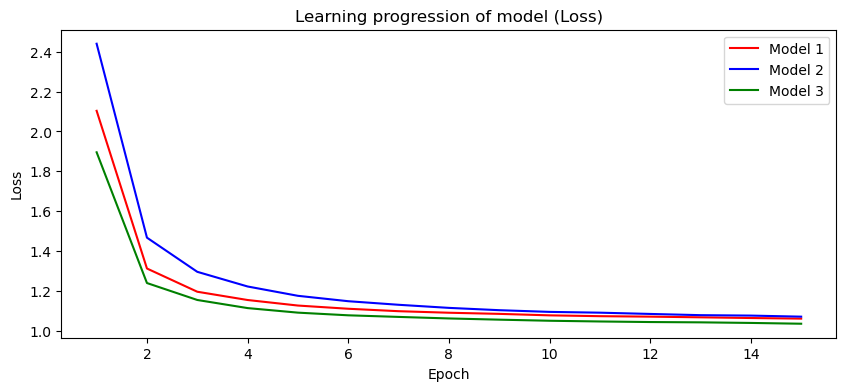

In [44]:
plt.figure(figsize=(10,4))
plt.plot(train_epoch,trainAvgLossArr, color = "red")
plt.plot(train_epoch2,trainAvgLossArr2, color = "blue")
plt.plot(train_epoch3,trainAvgLossArr3, color = "green")
plt.title('Learning progression of model (Loss)')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

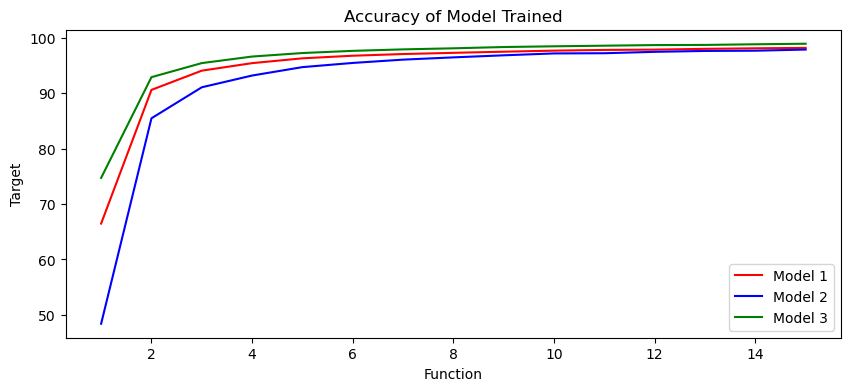

In [45]:
plt.figure(figsize=(10,4))
plt.plot(train_epoch,train_acc,color="red")
plt.plot(train_epoch2,train_acc2,color="blue")
plt.plot(train_epoch3,train_acc3,color="green")
plt.title('Accuracy of Model Trained')
plt.legend(['Model 1', 'Model 2','Model 3','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.show()